## Introduction

This notebook demonstrates the process of solving a linear regression problem using various methods. The code is designed to work with datasets comprised of numerical data, assuming that the target variable is in the first column of the data table. 

Here's a quick rundown of the notebook's contents:

- **Data Loading**: We will be loading data from a CSV file. Please make sure to specify the correct path to the .csv file in the code cell provided.

- **Data Splitting**: We will split the data into independent and dependent variables, followed by further subsets for training, cross-validation, and testing.

- **Feature Importance Calculation**: We calculate and filter features based on the Gini coefficient.

- **Feature Visualization**: We view correlations between features through a heat map.

- **Model Training**: We train various models, including Artificial Neural Networks, Ordinary Least Squares, and our custom linear regression model.

- **Model Evaluation**: Each model's performance is evaluated using the Mean Squared Error (MSE), and the results of each are compared in a final plot.

Remember to ensure that the `utils.py` file, which houses necessary functions, is in the same directory as this notebook for successful execution.


In [1]:
# Import libraries
from utils import *

2023-12-12 01:53:25.985996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data with your path to the table
df = pd.read_csv('weather_data_bucharest_2000_2023.csv', encoding = "ISO-8859-1")

In [3]:
# Split data into independent and dependent variables. The first column should be the dependent variable y.
y = df.iloc[:, 0] # The Y-axis variable
x = df.iloc[:, 1:] #.drop(columns='temp', axis=1)

In [4]:
# Split the data into 3 samples: train, cross validation (cv) and test
x_train, x_, y_train, y_ = train_test_split(x, y, train_size=.6, shuffle=False)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=.5, shuffle=False)

In [ ]:
best_min_split, best_max_depth, best_n_estimators = BestParam.best_forest_regressor(x_train, y_train, x_cv, y_cv)

In [ ]:
# Calculating the Gini coefficient for the variables and select the ones above 0
all_feature_importance = feature_importance(x_train, y_train, best_min_split, best_max_depth, best_n_estimators) # The parameters values are based on the previous step. Feel free to change if relevant
all_feature_importance

In [ ]:
# Filter the samples to only include the selected features
x_train_all = x_train[list(all_feature_importance.iloc[:, 0])]
x_cv_all = x_cv[list(all_feature_importance.iloc[:, 0])]

In [ ]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_all, y_train)

In [ ]:
# Compute the MSE using linear regression model by adding each feature to a new model. Iterate this throughout 4 degrees of polynomial.
selected_features, all_feature_importance = linear_regression_feature_performance(x_train_all, y_train, x_cv_all, y_cv, all_feature_importance, max_poly_degree=3, reduce_corr=True, corr_limit=0.8)

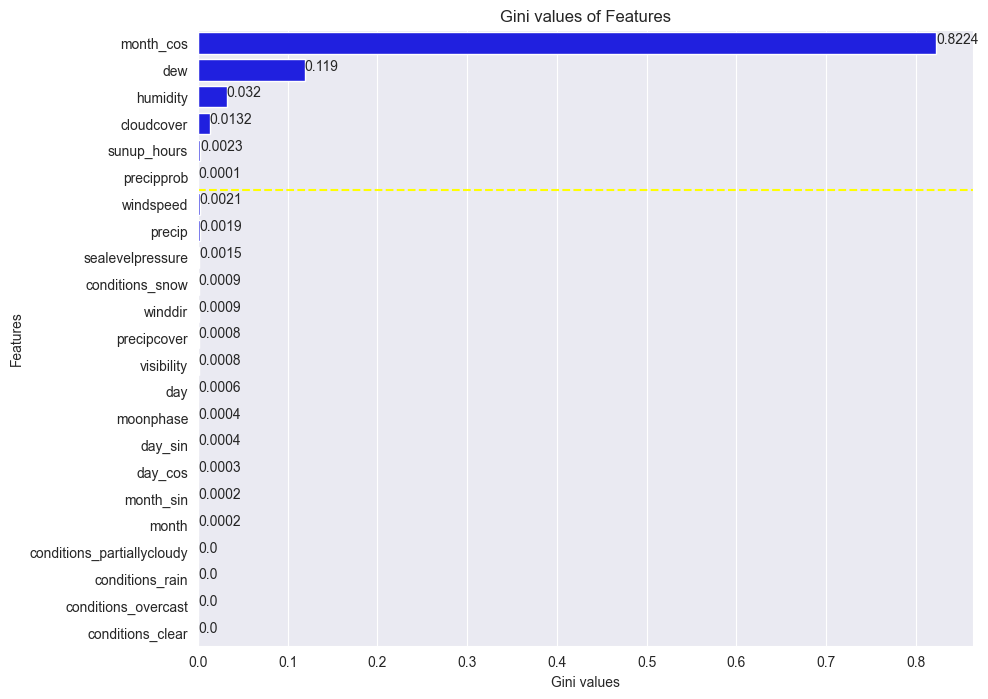

In [13]:
# Plot the gini value with the selected features
plot_selected_features(selected_features, all_feature_importance)

In [14]:
# Filter the samples to only include the selected features
x_train_rdy = x_train[list(selected_features.iloc[:, 0])]
x_cv_rdy = x_cv[list(selected_features.iloc[:, 0])]
x_test_rdy = x_test[list(selected_features.iloc[:, 0])]

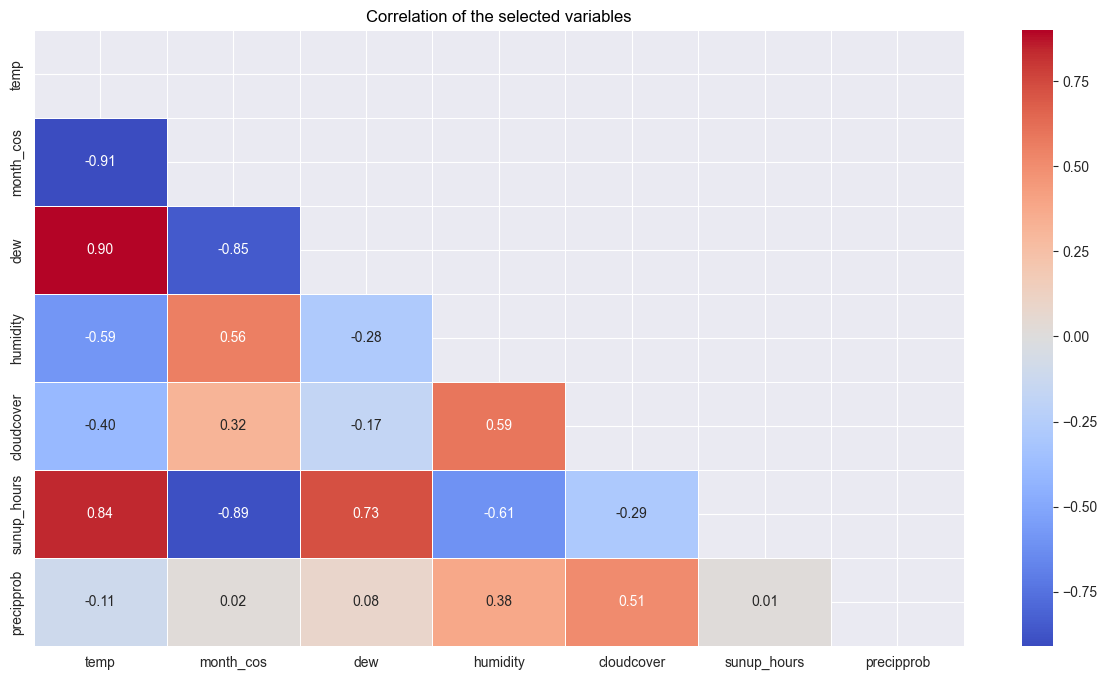

In [15]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_rdy, y_train)

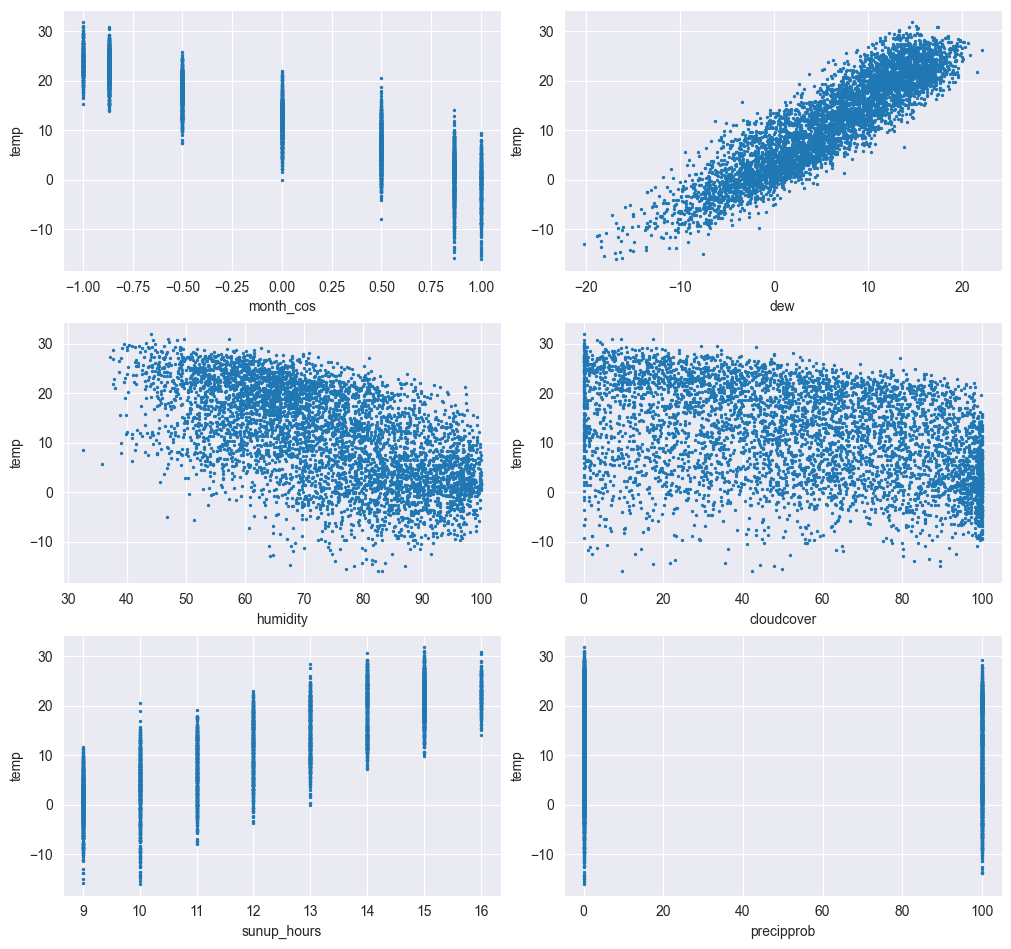

In [16]:
# Plot the selected features of the train sample
plot_features(x_train_rdy,y_train)

In [17]:
# Dictionaries to store models information
all_models = {}
all_mse = {}
all_standardscaler = {}
all_polyft = {}

55/55 [==============================] - 0s 583us/step
Development of the model with polynomial degree of 1
The MSE for the train set is 3.869954 and the Cross Validation is: 4.263227
55/55 [==============================] - 0s 613us/step
Development of the model with polynomial degree of 2
The MSE for the train set is 3.573491 and the Cross Validation is: 4.726332
55/55 [==============================] - 0s 652us/step
Development of the model with polynomial degree of 3
The MSE for the train set is 3.492794 and the Cross Validation is: 5.448092
55/55 [==============================] - 0s 655us/step
Development of the model with polynomial degree of 4
The MSE for the train set is 2.833918 and the Cross Validation is: 5.934290
55/55 [==============================] - 0s 665us/step
The mean squared error of the selected model of 1 polynomial degree on the test sample is 4.509766


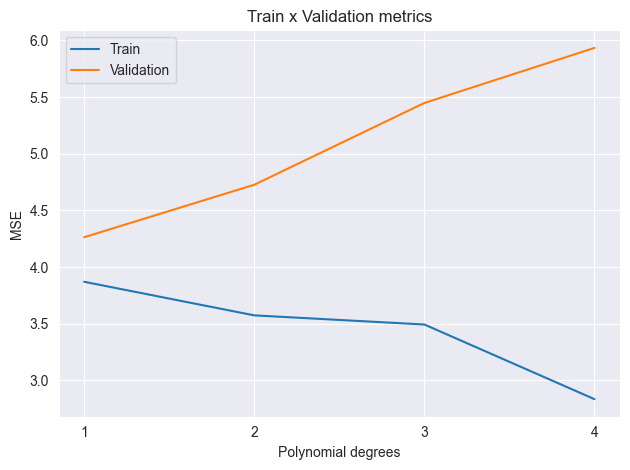

In [18]:
# Run a Neural Network with 3 LeakyReLU input layers with 24/16/8 units and alpha of 0.2 and a linear output layer using tensorflow.keras library
all_models['neural_network'], all_standardscaler['neural_network'], all_polyft['neural_network'], pred_test_nn, all_mse['neural_network'] = linear_neural_regression(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test, max_degree=4, learning_rate=0.001, epochs=500,verbose=0)

The mean squared error for the polynomial degree of 1 on the train sample is: 4.396699, the mean squared error on the crossvalidation sample is: 4.219468
The mean squared error for the polynomial degree of 2 on the train sample is: 4.013764, the mean squared error on the crossvalidation sample is: 3.991441
The mean squared error for the polynomial degree of 3 on the train sample is: 3.902180, the mean squared error on the crossvalidation sample is: 3.939564
The mean squared error for the polynomial degree of 4 on the train sample is: 3.796838, the mean squared error on the crossvalidation sample is: 4.098714
The mean squared error for the polynomial degree of 5 on the train sample is: 3.590883, the mean squared error on the crossvalidation sample is: 4.673974
The selected degree of polynomial is 3
The mean squared error of the selected model of 3 polynomial degree on the test sample is 4.192293


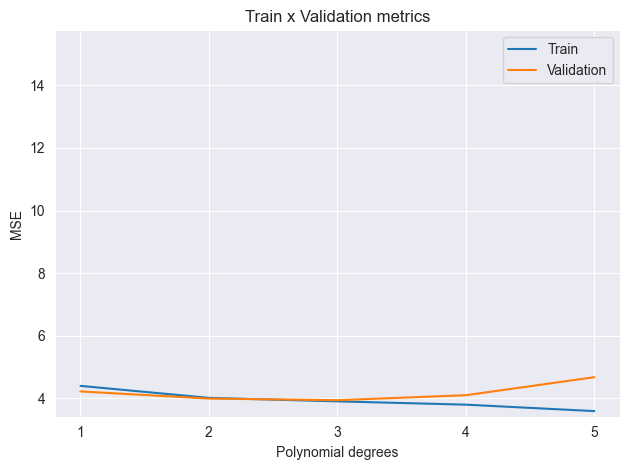

In [19]:
# Run a linear regression algorithm based on OLS (normal equation) using sci-kit learn library
all_models['ols'], all_standardscaler['ols'], all_polyft['ols'], pred_test_ols, all_mse['ols'] = linear_regression_ols(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test)

In [20]:
# Assign values for the gradient_descent function parameters
iterations = 10000
alpha = 5.0e-3
all_models['gradient'] = {}
# Run a manual linear regression algorithm with a gradient descent method
all_models['gradient']['w'], all_models['gradient']['b'],  all_standardscaler['gradient'], all_polyft['gradient'], pred_test_gd, all_mse['gradient'] = linear_regression_gradient_descent(x_train_rdy, 
                                                                        y_train, 
                                                                        x_cv_rdy, 
                                                                        y_cv, 
                                                                        x_test_rdy, 
                                                                        y_test, 
                                                                        alpha, 
                                                                        iterations, 
                                                                        last_errors=10, 
                                                                        cost_decimals=4)

Iteration 200: Cost [12.62007286]
Iteration 300: Cost [6.55002142]
Iteration 400: Cost [4.25475359]
Iteration 500: Cost [3.34195494]
Iteration 600: Cost [2.94991838]
Iteration 700: Cost [2.75982164]
Iteration 800: Cost [2.65200094]
Iteration 900: Cost [2.58062189]
Iteration 1000: Cost [2.52751216]
Iteration 1100: Cost [2.48503388]
Iteration 1200: Cost [2.44966987]
Iteration 1300: Cost [2.41958713]
Iteration 1400: Cost [2.39368974]
Iteration 1500: Cost [2.37123714]
Iteration 1600: Cost [2.35168165]
Iteration 1700: Cost [2.33459371]
Iteration 1800: Cost [2.31962402]
Iteration 1900: Cost [2.30648222]
Iteration 2000: Cost [2.29492356]
Iteration 2100: Cost [2.28443452]
Iteration 2200: Cost [2.27464735]
Iteration 2300: Cost [2.26610103]
Iteration 2400: Cost [2.25862428]
Iteration 2500: Cost [2.25207112]
Iteration 2600: Cost [2.24631683]
Iteration 2700: Cost [2.24125468]
Iteration 2800: Cost [2.23679315]
Iteration 2900: Cost [2.23285372]
Iteration 3000: Cost [2.22936887]
Iteration 3100: Cost 

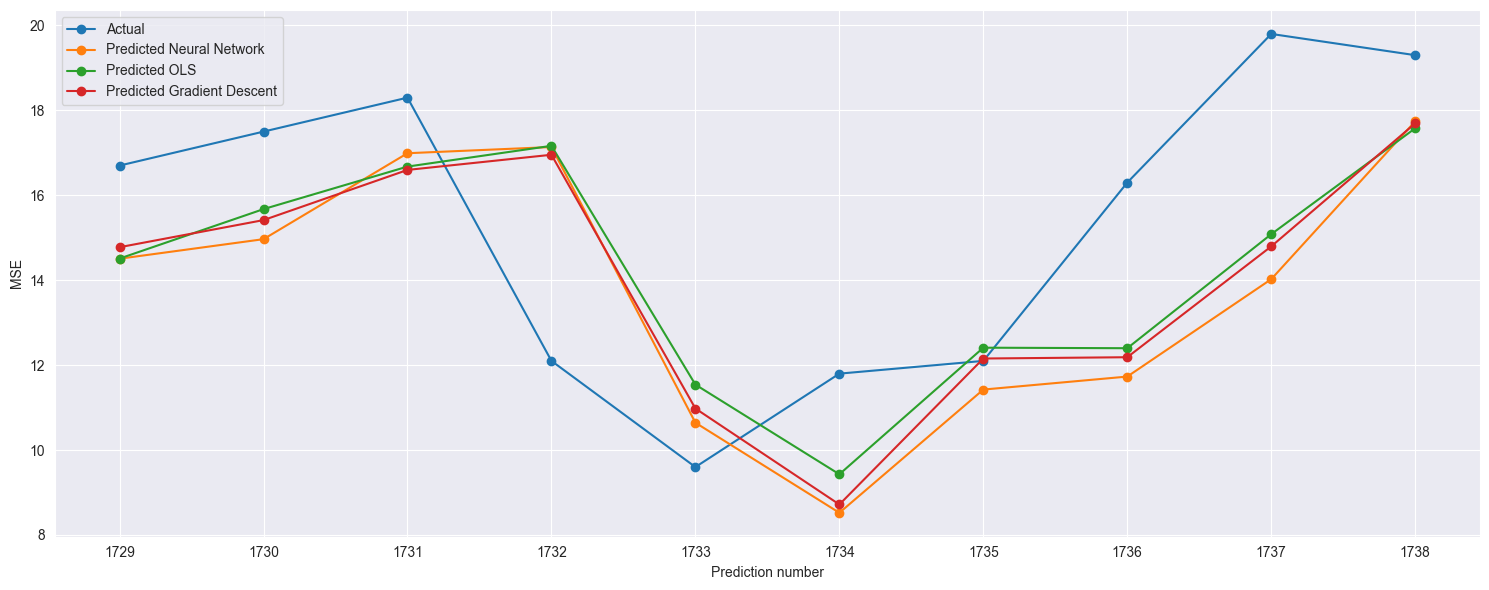

In [21]:
# Labels for the model names
model_labels = ['Neural Network', 'OLS', 'Gradient Descent']

# Plot Predicted values vs actual ones
plot_actual_vs_predicted(y_test, pred_test_nn, pred_test_gd, pred_test_ols, labels=model_labels, observations=10)